In [11]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
import seaborn


In [21]:
pip install pycaret[full]


In [22]:
#Load dataset
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [23]:
#Concat datasets
df = pd.concat([train, test])
df.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1       0.0       3  ...   7.2500   NaN         S
1            2       1.0       1  ...  71.2833   C85         C
2            3       1.0       3  ...   7.9250   NaN         S
3            4       1.0       1  ...  53.1000  C123         S
4            5       0.0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [24]:
df.describe()

PassengerId    Survived  ...        Parch         Fare
count  1309.000000  891.000000  ...  1309.000000  1308.000000
mean    655.000000    0.383838  ...     0.385027    33.295479
std     378.020061    0.486592  ...     0.865560    51.758668
min       1.000000    0.000000  ...     0.000000     0.000000
25%     328.000000    0.000000  ...     0.000000     7.895800
50%     655.000000    0.000000  ...     0.000000    14.454200
75%     982.000000    1.000000  ...     0.000000    31.275000
max    1309.000000    1.000000  ...     9.000000   512.329200

[8 rows x 7 columns]

In [25]:
df.corr()

PassengerId  Survived    Pclass  ...     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007 -0.038354  ... -0.055224  0.008942  0.031428
Survived       -0.005007  1.000000 -0.338481  ... -0.035322  0.081629  0.257307
Pclass         -0.038354 -0.338481  1.000000  ...  0.060832  0.018322 -0.558629
Age             0.028814 -0.077221 -0.408106  ... -0.243699 -0.150917  0.178740
SibSp          -0.055224 -0.035322  0.060832  ...  1.000000  0.373587  0.160238
Parch           0.008942  0.081629  0.018322  ...  0.373587  1.000000  0.221539
Fare            0.031428  0.257307 -0.558629  ...  0.160238  0.221539  1.000000

[7 rows x 7 columns]

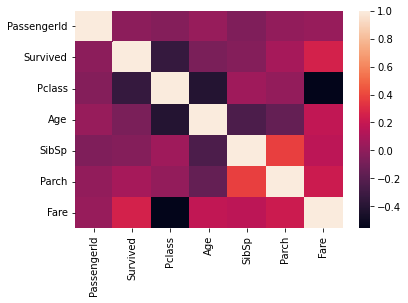

In [26]:
seaborn.heatmap(df.corr())

In [27]:
# Checking for null values

df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [28]:
# Removing duplicate entries if any

df.drop_duplicates(inplace = True)
print(df.shape)

(1309, 12)


In [29]:
# Encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder() 
df['Name'] = label_encoder.fit_transform(df['Name'])

df.head(10)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1       0.0       3  ...   7.2500   NaN         S
1            2       1.0       1  ...  71.2833   C85         C
2            3       1.0       3  ...   7.9250   NaN         S
3            4       1.0       1  ...  53.1000  C123         S
4            5       0.0       3  ...   8.0500   NaN         S
5            6       0.0       3  ...   8.4583   NaN         Q
6            7       0.0       1  ...  51.8625   E46         S
7            8       0.0       3  ...  21.0750   NaN         S
8            9       1.0       3  ...  11.1333   NaN         S
9           10       1.0       2  ...  30.0708   NaN         C

[10 rows x 12 columns]

In [30]:
label_encoder = LabelEncoder() 
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Ticket'] = label_encoder.fit_transform(df['Ticket'])
df['Cabin'] = label_encoder.fit_transform(df['Cabin'])
df['Embarked'] = label_encoder.fit_transform(df['Sex'])


TypeError: ignored

In [31]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   int64  
 4   Sex          1309 non-null   int64  
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   int64  
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 132.9+ KB


In [32]:
#Checking null values
df.isnull().values.any()

True

In [33]:
#Checking null values
np.isnan(df).any()

TypeError: ignored

In [34]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


In [35]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [36]:
df.fillna(0, inplace=True)


In [37]:
np.isnan(df).any()

TypeError: ignored

In [38]:
df.shape

(1309, 12)

In [39]:
df['Survived'].value_counts()

0.0    967
1.0    342
Name: Survived, dtype: int64

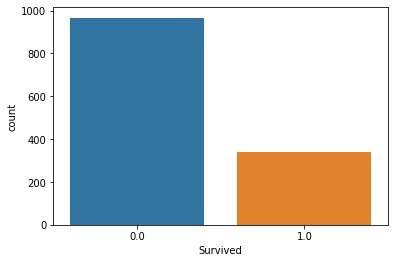

In [40]:
seaborn.countplot(df['Survived'])

In [41]:
#Oversampling
msk = df['Survived'] == 1
num_to_oversample = len(df) - 2*msk.sum()
df_positive_oversample = df[msk].sample(n=num_to_oversample, replace=True, random_state=888)
df_oversample = pd.concat([df, df_positive_oversample])
df_oversample['Survived'].value_counts()

1.0    967
0.0    967
Name: Survived, dtype: int64

In [42]:
x=df_oversample.drop('Survived',axis=1) #remove class atribute

In [43]:
from google.colab import files
df_oversample.to_csv('titanic.csv') 
files.download('titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
x

PassengerId  Pclass  Name  Sex  ...  Ticket     Fare  Cabin  Embarked
0              1       3   155    1  ...     720   7.2500      0         S
1              2       1   286    0  ...     816  71.2833    C85         C
2              3       3   523    0  ...     914   7.9250      0         S
3              4       1   422    0  ...      65  53.1000   C123         S
4              5       3    22    1  ...     649   8.0500      0         S
..           ...     ...   ...  ...  ...     ...      ...    ...       ...
587          588       1   416    1  ...      96  79.2000    B41         C
577          578       1  1090    0  ...      93  55.9000    E44         S
301          302       3   771    1  ...     608  23.2500      0         Q
369          370       1    72    0  ...     795  69.3000    B35         C
559          560       3  1298    0  ...     416  17.4000      0         S

[1934 rows x 11 columns]

In [45]:
y=df_oversample['Survived']

In [46]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
587    1.0
577    1.0
301    1.0
369    1.0
559    1.0
Name: Survived, Length: 1934, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [49]:
xtrain = xtrain.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [50]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtc=DecisionTreeClassifier()

In [52]:
dtc.fit(xtrain,ytrain)

ValueError: ignored

In [53]:
dtc.score(xtest,ytest)

NotFittedError: ignored

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, plot_roc_curve

In [55]:
plot_roc_curve(dtc, xtest, ytest);

NotFittedError: ignored

In [56]:
y_pred=dtc.predict(xtest)

NotFittedError: ignored

In [57]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

In [58]:
conf_matrix(ytest,y_pred)

NameError: ignored

In [59]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [60]:
neighbors_settings=range(1,26) #KNN 25 times
for n_neighbors in neighbors_settings:
  knn=KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(xtrain,ytrain)

ValueError: ignored

In [61]:
neighbors_settings=range(1,26) #KNN 25 times
for n_neighbors in neighbors_settings:
  knn=KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(xtrain,ytrain)

ValueError: ignored

In [62]:
knn.score(xtest,ytest)

ValueError: ignored

In [63]:
y_pred=knn.predict(xtest)

ValueError: ignored

In [64]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

In [65]:
conf_matrix(ytest,y_pred)

NameError: ignored

In [66]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

ValueError: ignored

In [67]:
lr_y_pred = lr.predict(xtest)

NotFittedError: ignored

In [68]:
lr.score(xtest,ytest)

NotFittedError: ignored

In [69]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, xtest, ytest)

NotFittedError: ignored

In [70]:
y_pred=lr.predict(xtest)

NotFittedError: ignored

In [71]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

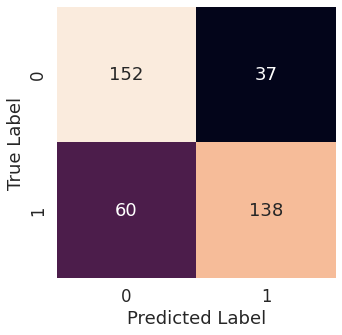

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
conf_matrix(ytest,y_pred)

In [ ]:
#Random Forest Classifier(Highest Accuracy)
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()  #create object

In [ ]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
rfc.score(xtest,ytest)

0.9354005167958657

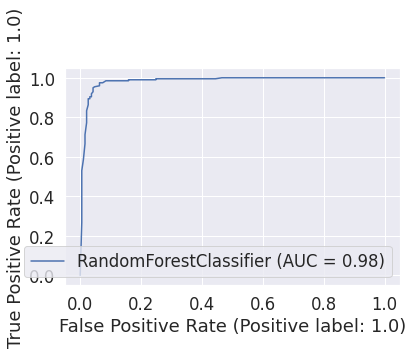

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc, xtest, ytest)

In [ ]:
rfc_y_pred=rfc.predict(xtest)

In [ ]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

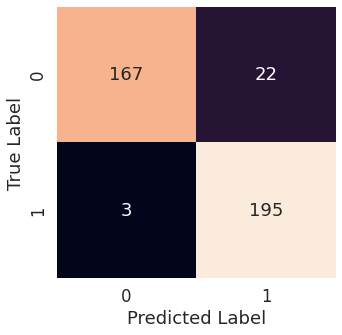

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
conf_matrix(ytest,rfc_y_pred)

In [ ]:
print(classification_report(ytest,rfc_y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93       189
         1.0       0.90      0.98      0.94       198

    accuracy                           0.94       387
   macro avg       0.94      0.93      0.94       387
weighted avg       0.94      0.94      0.94       387



In [ ]:
df_oversample.to_csv('titanic.csv',index=False)

In [ ]:
df_oversample

PassengerId  Survived  Pclass  Name  ...  Ticket     Fare  Cabin  Embarked
0              1       0.0       3   155  ...     720   7.2500    186         1
1              2       1.0       1   286  ...     816  71.2833    106         0
2              3       1.0       3   523  ...     914   7.9250    186         0
3              4       1.0       1   422  ...      65  53.1000     70         0
4              5       0.0       3    22  ...     649   8.0500    186         1
..           ...       ...     ...   ...  ...     ...      ...    ...       ...
587          588       1.0       1   416  ...      96  79.2000     39         1
577          578       1.0       1  1090  ...      93  55.9000    161         0
301          302       1.0       3   771  ...     608  23.2500    186         1
369          370       1.0       1    72  ...     795  69.3000     33         0
559          560       1.0       3  1298  ...     416  17.4000    186         0

[1934 rows x 12 columns]

In [ ]:
predictions = rfc.predict(df_oversample)


ValueError: ignored